In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os,warnings
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip > codon.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1963k  100 1963k    0     0  1003k      0  0:00:01  0:00:01 --:--:-- 1002k


In [3]:
!unzip /content/codon.zip

Archive:  /content/codon.zip
  inflating: codon_usage.csv         
   creating: __MACOSX/
  inflating: __MACOSX/._codon_usage.csv  


In [4]:
current_dir=os.getcwd()
print(current_dir)

/content


In [5]:
# os.listdir(current_dir)

In [6]:
# datapath=os.path.join(current_dir,"codon_usage.csv")
data=pd.read_csv("/content/codon_usage.csv")

In [7]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [8]:
data.describe()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.00000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.020637,0.014104,0.017820,0.018288,0.019044,0.018450,0.028352,0.025041,0.018294,0.021135,0.017647,0.015175,0.013621,0.016443,0.019935,0.023804,0.019062,0.011699,0.012944,0.01265,0.015694,0.008598,0.011611,0.017217,0.019063,0.018426,0.010530,0.014700,0.013245,0.015392,0.007161,0.009647,0.011086,0.015974,0.019374,0.019109,0.008226,0.018207,0.016175,0.019366,0.015487,0.022531,0.021981,0.007290,0.007595,0.011540,0.012172,0.028504,0.021530,0.008008,0.009659,0.006965,0.005454,0.009929,0.006422,0.024178,0.021164,0.028290,0.021683,0.001645,0.000592,0.006178
std,0.688726,124787.086107,7.197010e+05,0.020709,0.009280,0.010586,0.014572,0.024250,0.016578,0.017507,0.014600,0.016044,0.008163,0.009953,0.010069,0.008315,0.011719,0.009890,0.017244,0.009112,0.013572,0.006765,0.00911,0.009606,0.008960,0.006569,0.010492,0.014768,0.009325,0.007139,0.008950,0.007594,0.009217,0.006120,0.006498,0.006571,0.008210,0.012453,0.013001,0.006774,0.011818,0.007353,0.011300,0.011284,0.015032,0.009510,0.006231,0.006440,0.006843,0.006604,0.017890,0.014577,0.006310,0.010680,0.004787,0.006605,0.008574,0.006387,0.013828,0.013041,0.014342,0.015018,0.001834,0.000907,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.005610,0.007107,0.010890,0.007830,0.005307,0.007180,0.016360,0.015130,0.006320,0.015788,0.010520,0.008220,0.006940,0.006900,0.013300,0.010330,0.012990,0.002940,0.008430,0.00571,0.009250,0.002510,0.007107,0.009980,0.008977,0.011967,0.005577,0.008680,0.007820,0.008860,0.002577,0.004280,0.006707,0.010618,0.010050,0.010080,0.003180,0.009650,0.010960,0.012850,0.005848,0.011360,0.015560,0.002660,0.003600,0.007030,0.007187,0.017315,0.010245,0.003150,0.002880,0.003340,0.001220,0.001690,0.001170,0.012380,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.015260,0.013360,0.016130,0.014560,0.009685,0.012800,0.025475,0.021540,0.014140,0.022000,0.017135,0.013160,0.012670,0.014520,0.018810,0.020245,0.018590,0.007080,0.012410,0.01099,0.014300,0.005670,0.012060,0.015545,0.015390,0.017520,0.009760,0.013730,0.012460,0.014600,0.005600,0.009450,0.010560,0.015680,0.017185,0.016660,0.006550,0.016080,0.015430,0.019040,0.014510,0.019800,0.021170,0.006160,0.006530,0.010620,0.011460,0.025315,0.021090,0.006875,0.00

In [9]:
print(f"No of Instances in the dataset : {data.shape[0]}")
print(f"No of Feature Attributes in the dataset : {data.shape[1]}")

No of Instances in the dataset : 13028
No of Feature Attributes in the dataset : 69


In [10]:
#let's check null values
data.isnull().sum()

Kingdom        0
DNAtype        0
SpeciesID      0
Ncodons        0
SpeciesName    0
              ..
GAA            0
GAG            0
UAA            0
UAG            0
UGA            0
Length: 69, dtype: int64

In [11]:
data.count()

Kingdom        13028
DNAtype        13028
SpeciesID      13028
Ncodons        13028
SpeciesName    13028
               ...  
GAA            13028
GAG            13028
UAA            13028
UAG            13028
UGA            13028
Length: 69, dtype: int64

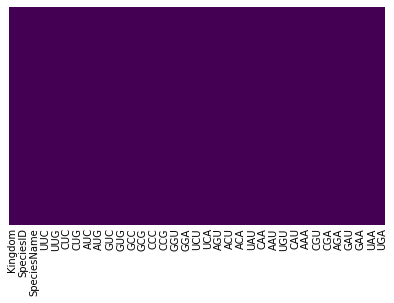

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
#we dont have any null values

In [13]:
data.corr()

,DNAtype,SpeciesID,Ncodons,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,1.000000,-0.020671,-0.053869,0.460140,-0.039368,0.379493,0.067398,0.459092,-0.314457,0.459489,0.139633,0.450543,-0.370711,-0.075786,-0.326667,0.388764,-0.444529,-0.054618,-0.120465,0.038375,-0.321904,0.040092,0.030773,0.162293,-0.327085,-0.253791,-0.150230,-0.287360,0.162658,-0.118836,0.319150,0.116897,0.369147,-0.267585,-0.054738,-0.378618,0.125209,-0.010546,0.206605,-0.385975,0.309038,-0.191991,0.135501,-0.497118,0.097715,-0.184751,-0.092093,-0.310061,0.225472,-0.019619,0.100603,-0.494721,-0.077338,-0.294142,0.486671,-0.218562,-0.085861,-0.324625,-0.273616,-0.459248,-0.100670,-0.497575,0.122864,-0.029795,0.458572
SpeciesID,-0.020671,1.000000,0.051598,0.025723,-0.047561,0.055892,0.021963,0.051111,-0.044642,0.036697,0.005852,0.033401,-0.046252,0.010858,-0.010495,0.036437,-0.064720,-0.047803,0.002322,0.026539,0.031263,-0.014679,0.014195,0.013054,0.012185,-0.024395,-0.050512,-0.012082,-0.092768,-0.024257,-0.000419,-0.033138,0.042584,-0.002189,-0.031704,-0.062363,0.016525,0.019708,0.059696,0.034685,0.043598,-0.064636,0.053152,-0.041001,0.031605,-0.019295,-0.028383,-0.071218,0.041763,0.004909,0.016175,-0.077068,0.035849,0.017333,0.019185,0.011598,-0.026532,-0.000266,-0.005639,-0.029184,-0.014164,-0.079152,0.048676,-0.008848,0.050192
Ncodons,-0.053869,0.051598,1.000000,-0.033718,0.009483,-0.040623,-0.001755,-0.049954,0.081045,-0.039622,-0.002191,-0.047398,0.028350,-0.022570,0.034381,-0.044701,0.070384,-0.029450,0.038999,-0.022505,0.095830,-0.038599,-0.008935,-0.051360,0.076949,0.015586,-0.008722,0.062545,-0.039698,0.024386,-0.041632,-0.021989,-0.057504,0.056881,0.000142,0.051111,-0.060162,-0.003186,-0.053456,0.057664,-0.027046,-0.028911,-0.030054,0.060495,-0.015345,-0.031713,-0.023612,-0.002097,-0.009901,-0.013986,-0.008628,0.019153,0.016334,0.082777,-0.038159,0.068304,-0.010998,0.001491,0.024825,0.034597,0.028578,0.053022,-0.026197,0.003334,-0.047956
UUA,0.460140,0.025723,-0.033718,1.000000,0.024444,0.255725,-0.364357,0.189287,-0.552023,0.821485,-0.294364,0.665876,-0.261180,0.301184,-0.609043,0.583834,-0.539014,0.125504,-0.483602,0.124997,-0.428098,0.210976,-0.355398,0.141827,-0.469755,-0.328229,0.105981,-0.544577,0.213093,-0.204575,0.461872,-0.356974,0.466449,-0.423936,0.305540,-0.503817,0.375327,-0.402054,0.295330,-0.446992,0.623699,-0.478440,0.297657,-0.589303,0.562999,-0.434060,0.103723,-0.426466,0.290840,-0.408861,0.443179,-0.496645,-0.061449,-0.485974,0.177212,-0.396365,0.231872,-0.273705,0.081008,-0.633599,0.188387,-0.577686,0.256173,0.009338,0.331463
UUG,-0.039368,-0.047561,0.009483,0.024444,1.000000,-0.008412,-0.476516,-0.418961,-0.145852,0.032653,-0.493110,-0.171184,0.346246,0.467889,-0.196891,-0.040509,0.162037,0.267261,-0.406779,-0.164225,-0.060348,0.141235,-0.405882,-0.210462,-0.080017,0.330815,0.308022,-0.302890,-0.086186,0.128305,0.402713,-0.305242,-0.115612,0.111313,0.491279,-0.132173,0.158440,-0.462825,-0.308946,0.024526,0.382876,-0.262292,0.109053,0.048460,0.311419,-0.333384,0.406788,-0.025843,0.416775,-0.420134,0.230250,0.241142,0.302262,-0.150837,-0.008200,-0.036611,0.396104,0.288006,0.475718,-0.159748,0.315423,0.115329,-0.126004,0.054169,-0.468188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.100670,-0.014164,0.028578,0.188387,0.315423,-0.027929,-0.532930,-0.286724,-0.291093,0.175480,-0.425997,-0.016999,0.255852,0.377519,-0.384229,0.255382,-0.190310,0.245570,-0.519709,0.133189,-0.164999,0.083510,-0.557169,-0.057625,-0.177578,0.061613,0.330717,-0.395878,0.118096,-0.218217,0.206527,-0.482777,0.047241,-0.139158,0.4

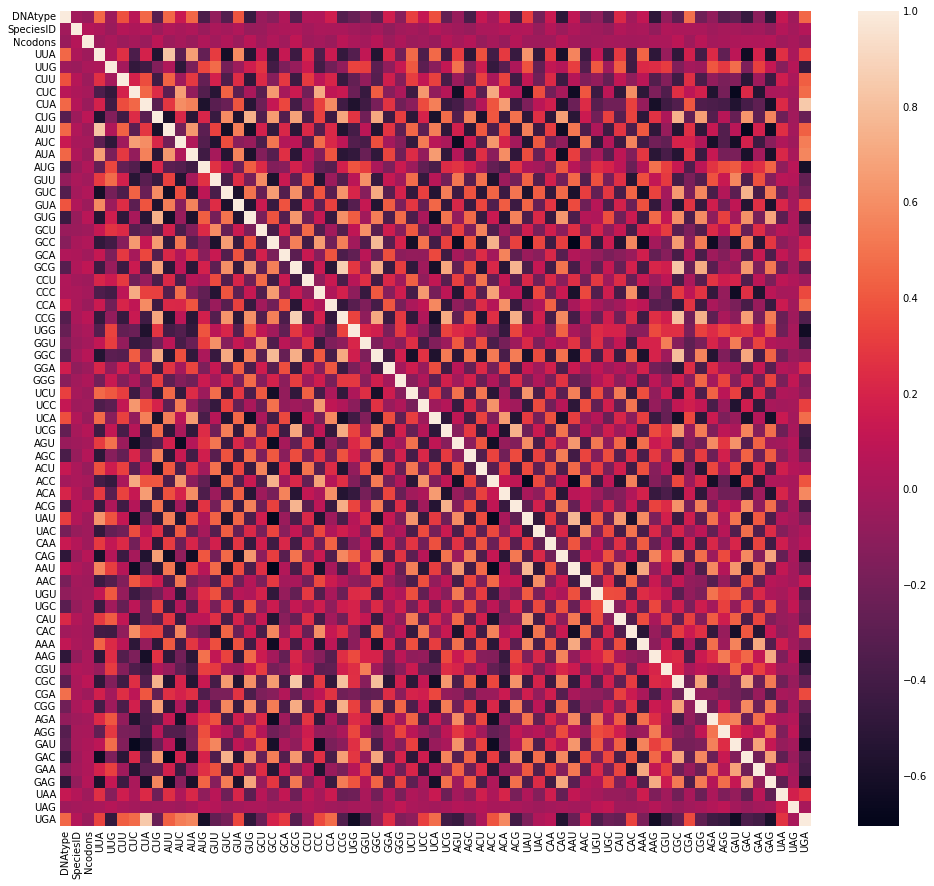

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap='rocket',cbar=True,yticklabels=True)

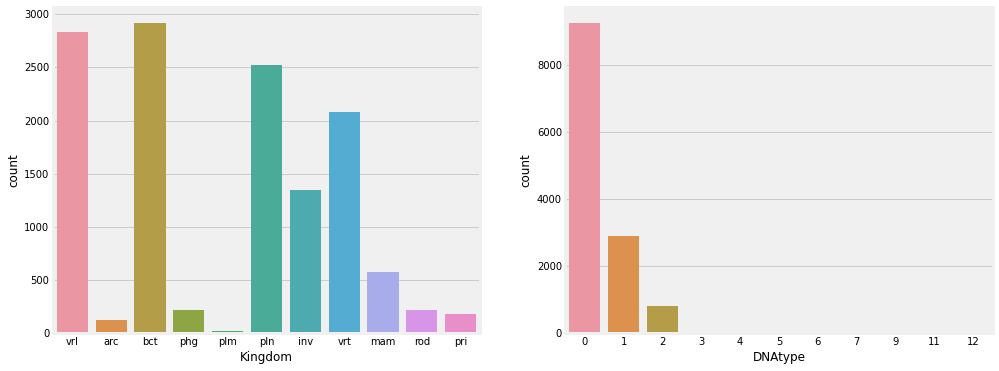

In [15]:
ax=plt.figure(figsize=(15,6))
ax.add_subplot(121)
sns.countplot(data["Kingdom"])
ax.add_subplot(122)
sns.countplot(data["DNAtype"])

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoding=LabelEncoder()
data["KingdomID"]=encoding.fit_transform(data["Kingdom"])

In [18]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,KingdomID
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9


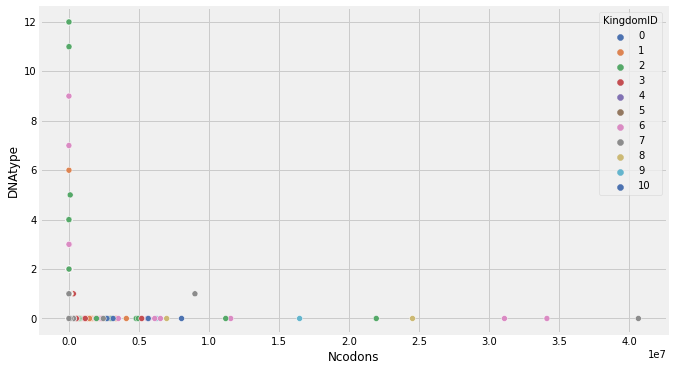

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Ncodons",y="DNAtype",data=data,hue="KingdomID",palette="deep")

In [20]:
data["Ncodons_log"]=np.log(data["Ncodons"])

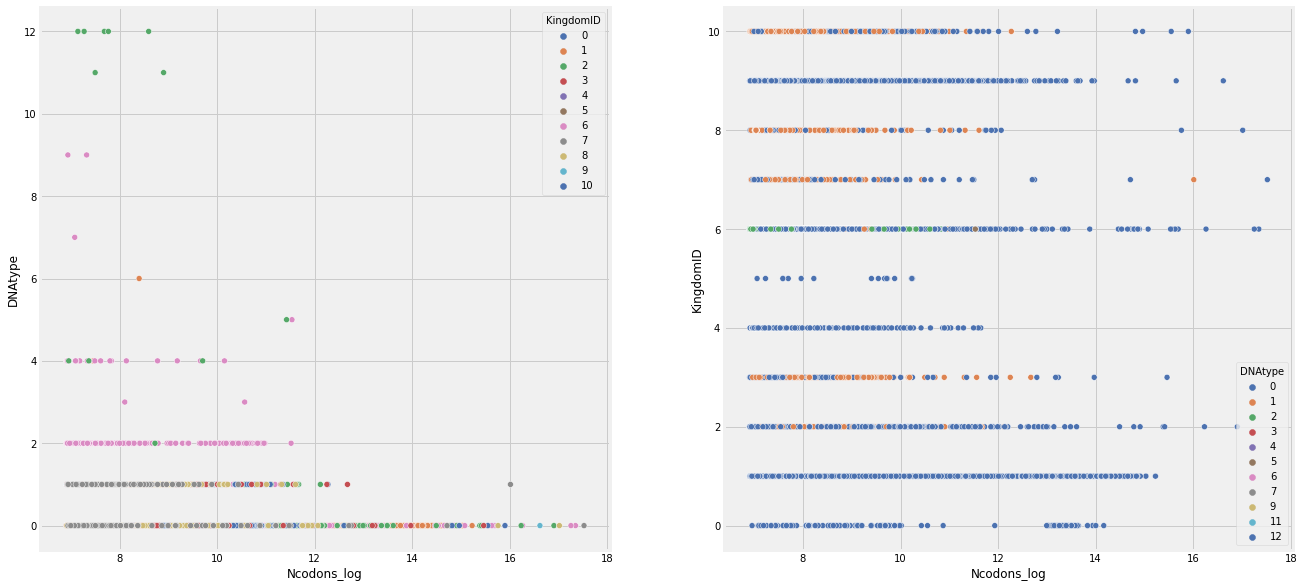

In [21]:
ax=plt.figure(figsize=(20,10))
ax.add_subplot(121)
sns.scatterplot(x="Ncodons_log",y="DNAtype",data=data,hue="KingdomID",palette="deep")
ax.add_subplot(122)
sns.scatterplot(x="Ncodons_log",y="KingdomID",data=data,hue="DNAtype",palette="deep")

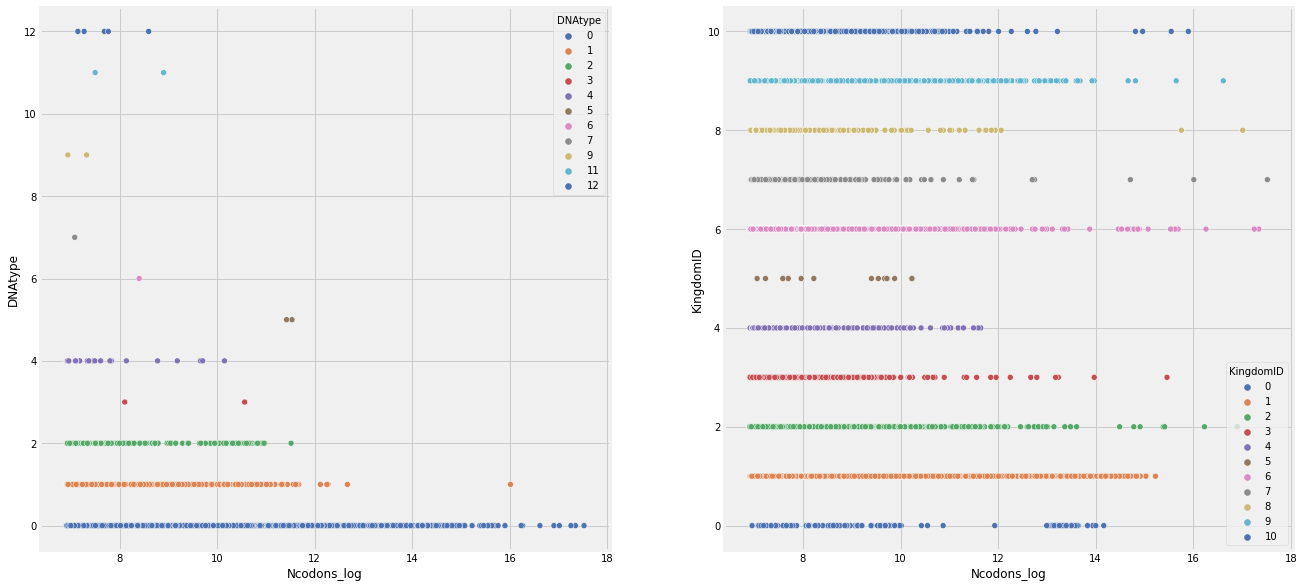

In [22]:
ax=plt.figure(figsize=(20,10))
ax.add_subplot(121)
sns.scatterplot(x="Ncodons_log",y="DNAtype",data=data,hue="DNAtype",palette="deep")
ax.add_subplot(122)
sns.scatterplot(x="Ncodons_log",y="KingdomID",data=data,hue="KingdomID",palette="deep")

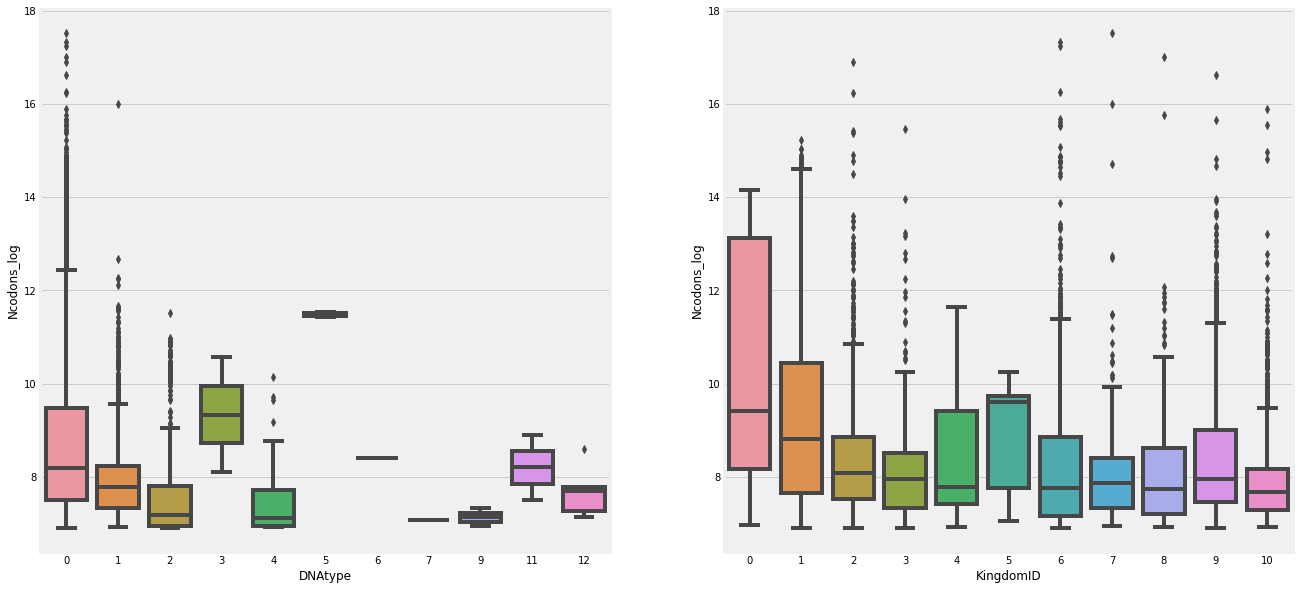

In [23]:
ax=plt.figure(figsize=(20,10))
ax.add_subplot(121)
sns.boxplot(x="DNAtype",y="Ncodons_log",data=data)
ax.add_subplot(122)
sns.boxplot(x="KingdomID",y="Ncodons_log",data=data)

[(0.0, 12.0)]

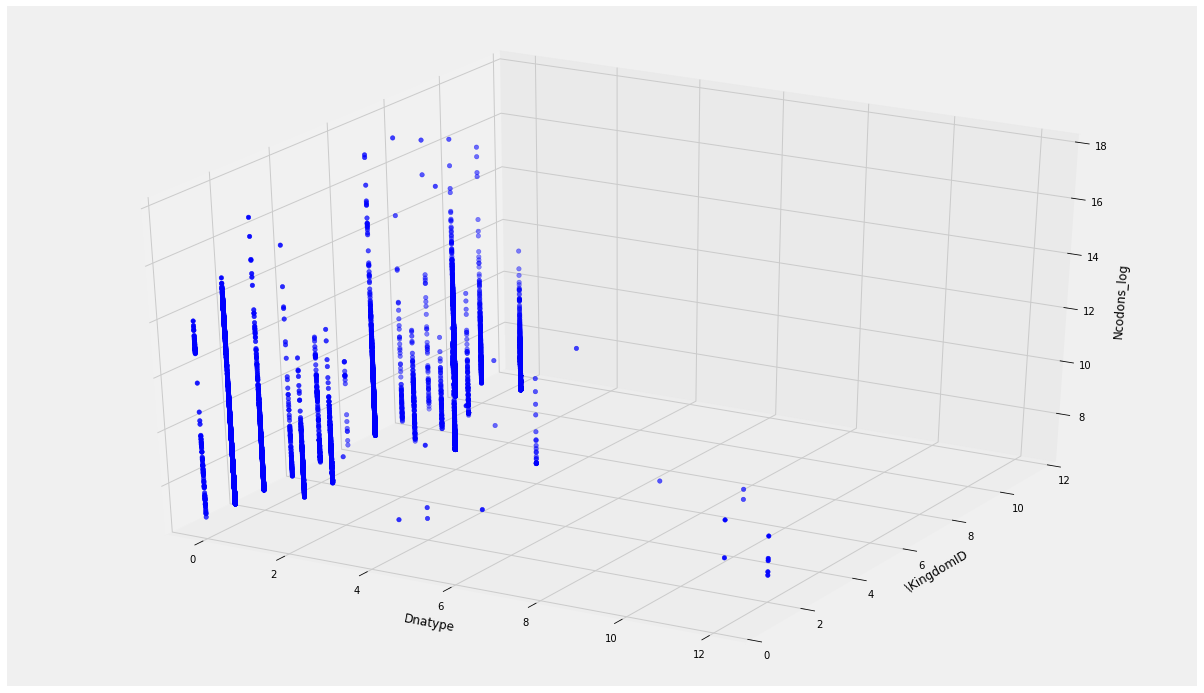

In [24]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(1,1,1,projection='3d')
ax.scatter(data['DNAtype'],data['KingdomID'],data['Ncodons_log'],c="blue")
ax.set(xlabel='\nDnatype',ylabel='\KingdomID',zlabel='\nNcodons_log')
ax.set(ylim=[0,12])

In [25]:
codes_data=data[[ 'Ncodons','UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA']]

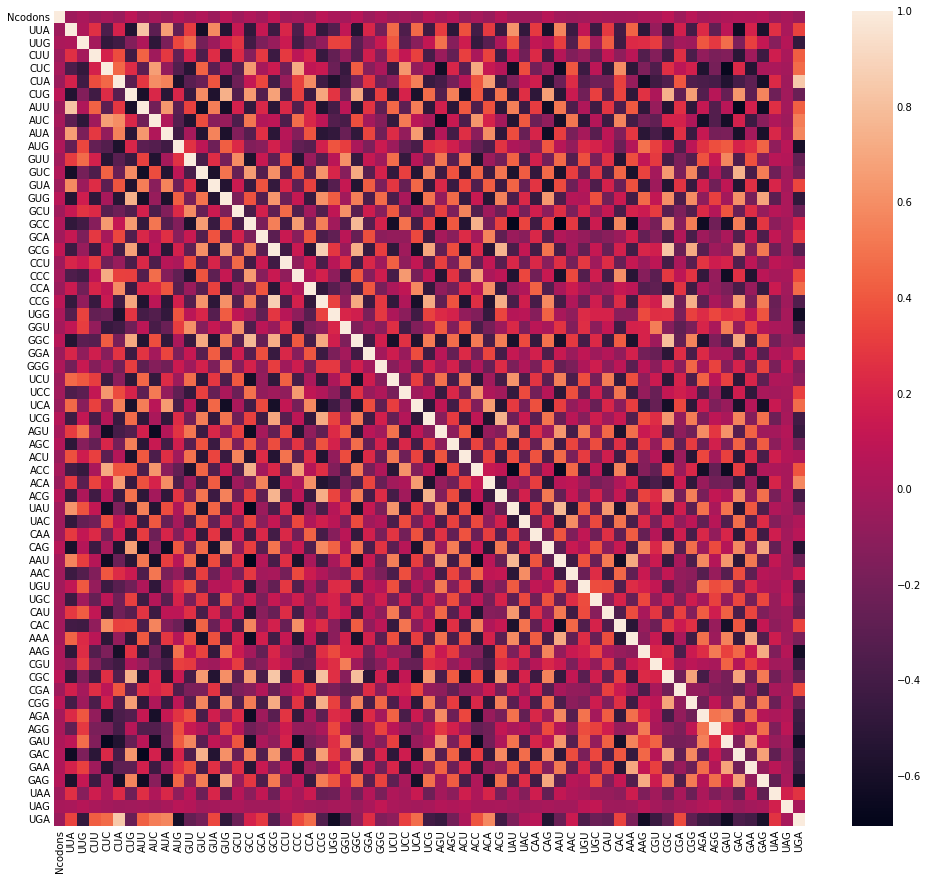

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(codes_data.corr(),cmap='rocket',cbar=True,yticklabels=True)

In [27]:
data.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA', 'KingdomID', 'Ncodons_log'],
      dtype='object')

In [28]:
headername=[
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG']
for i in headername:
    try:
        test=data.corr()[i].sort_values(ascending=False).to_frame()[:2]
    except:
        continue
    print(test.to_string())

          UUA
UUA  1.000000
AUU  0.821485
          UUG
UUG  1.000000
AGU  0.491279
         CUU
CUU  1.00000
AUU  0.43501
          CUC
CUC  1.000000
CCC  0.719047
          CUA
CUA  1.000000
UGA  0.842416
          CUG
CUG  1.000000
CGC  0.744751
          AUU
AUU  1.000000
UUA  0.821485
          AUC
AUC  1.000000
CUC  0.664547
          AUA
AUA  1.000000
UUA  0.665876
          AUG
AUG  1.000000
AAG  0.491906
         GUU
GUU  1.00000
GGU  0.60756
          GUC
GUC  1.000000
GAC  0.744394
          GUA
GUA  1.000000
UUA  0.583834
          GUG
GUG  1.000000
CUG  0.736891
          GCU
GCU  1.000000
GGU  0.609509
          GCC
GCC  1.000000
GGC  0.778114
          GCA
GCA  1.000000
ACA  0.555872
          GCG
GCG  1.000000
CCG  0.869467
          CCU
CCU  1.000000
ACU  0.499553
          CCC
CCC  1.000000
CUC  0.719047
        CCA
CCA  1.0000
ACA  0.6134
          CCG
CCG  1.000000
GCG  0.869467
          UGG
UGG  1.000000
CAG  0.433663
          GGU
GGU  1.000000
GCU  0.609509
    

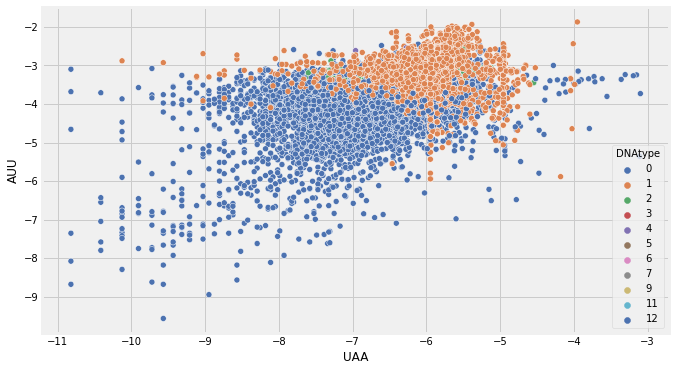

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(np.log(data["UAA"]),np.log(data["AUU"]),data=data,hue="DNAtype",palette="deep")

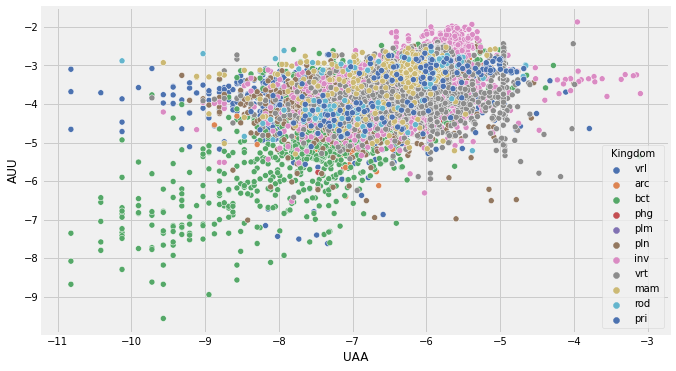

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(np.log(data["UAA"]),np.log(data["AUU"]),data=data,hue="Kingdom",palette="deep")

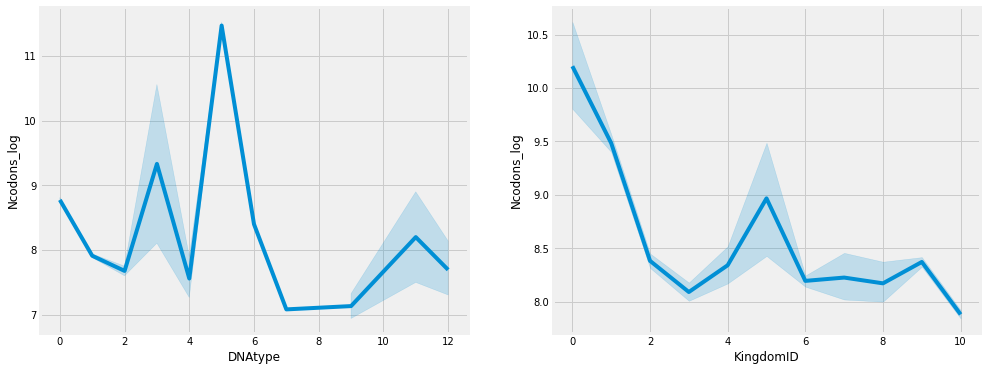

In [31]:
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
sns.lineplot(x="DNAtype",y="Ncodons_log",data=data)
fig.add_subplot(1,2,2)
sns.lineplot(x="KingdomID",y="Ncodons_log",data=data)

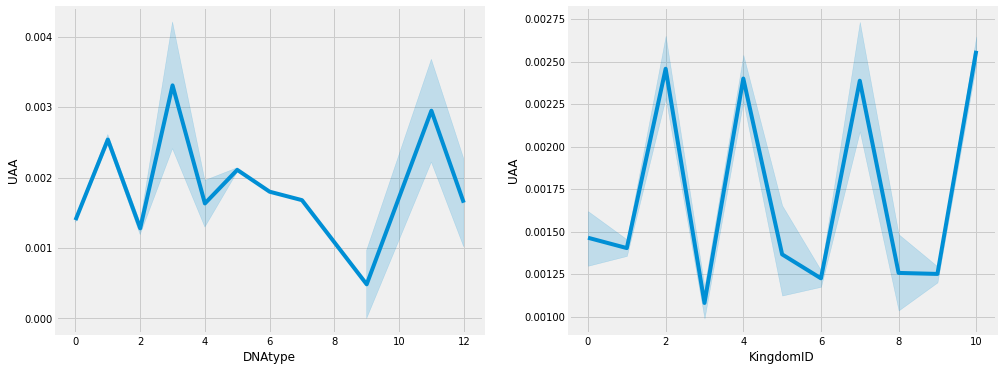

In [32]:
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,2,1)
sns.lineplot(x="DNAtype",y="UAA",data=data)
fig.add_subplot(1,2,2)
sns.lineplot(x="KingdomID",y="UAA",data=data)

## **Basic machine learning algorithms**

Since the data in the dataset is of different ranges, the use of any classifier without scaling the data will result in the output being more sensitive towards those attributes which have a higher magnitude

In [33]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,KingdomID,Ncodons_log
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9,7.598399
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9,7.295735
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9,8.489205
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9,7.557473
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9,10.035875


In [34]:
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [35]:
cols = ['Kingdom', 'SpeciesID', 'SpeciesName']
data_cleaned = data.drop(cols, axis = 1)
data_cleaned = data_cleaned.drop([5063, 486], axis = 0)

Using the entire data for creatig a support vector machine, and finding out it's score by doing a K- fold cross validation, using k = 10.

In [36]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(data_cleaned.drop('KingdomID', axis = 1))

We take the mean of the cross validated data so as to bring a non biased conclusion of the score

In [37]:
svm_model = svm.SVC()
ten_cross_validation = cross_val_score(svm_model,
                                      data_scale,
                                      data_cleaned['KingdomID'],
                                      cv = 10 #this is the number of cross validations which are to be performed
                                     )
print(ten_cross_validation)
print(np.mean(ten_cross_validation))

[0.90867229 0.92555641 0.92325403 0.93323101 0.92785879 0.90636992
 0.93241167 0.92626728 0.92242704 0.91858679]
0.9224635220859814


As the above cell shows, the score obtained is 0.9224, which is quite a good accuracy for a machine learning model.
And since the score is not too high, we can safely state that the model is not overfitting

In [38]:
def svm_model_function(input_data, output_data):
  svm_model = svm.SVC()
  ten_cross_validation = cross_val_score(svm_model,
                                        input_data,
                                        output_data,
                                        cv = 10 #this is the number of cross validations which are to be performed
                                        )
  return ten_cross_validation, np.mean(ten_cross_validation)


In [39]:
list_output = []
for i in range(1,25):
    
    
    pca_model = PCA(n_components = i)
    pca_dataset = pca_model.fit_transform(data_scale)
    
    values, mean = svm_model_function(pca_dataset, data_cleaned['KingdomID'])
    list_output.append(mean)

In [40]:
list_output

[0.3575156822315983,
 0.5274773564019226,
 0.6093927165598,
 0.6690431392520864,
 0.7237794620237123,
 0.7592480073751581,
 0.7823517865542474,
 0.7958646182212147,
 0.8066122960956225,
 0.8148270032643564,
 0.8254207176396665,
 0.8351711105059458,
 0.847840561719204,
 0.8532913529336177,
 0.8608919744463032,
 0.8688755005876784,
 0.8743274117509753,
 0.8793185523658625,
 0.8842308250015032,
 0.8856901183962803,
 0.8875325521984598,
 0.8903725067874797,
 0.8926758879721026,
 0.895439862871101]

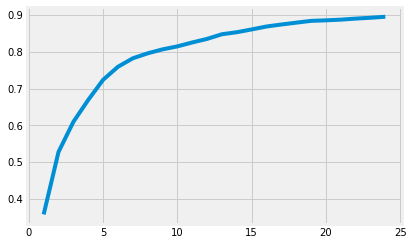

In [41]:
sns.lineplot(y = list_output, 
             x = [i for i in range(1, 25)])

Looking at the graph, we can analyse that the curve somewhat looks like a **logarithmic** graph, while using the PCA attribute reduction mechanism.

Even though the maximum value that we can get with addition of all the attributes that is about 65 of them, we get a score of about 0.92, and just by including 25 of them we will get an accuracy of 0.8964, which is a pretty good accuracy considering the fact that we are using less than half of the original attributes.

In [42]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data_scale, data_cleaned['KingdomID'], test_size = 0.3, random_state = 42)

In [43]:
# Create the model with 100 trees
RSEED = 50
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [44]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 2119
Average maximum depth 23


In [45]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [46]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes = []
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 14  10   1   0   0   0   3   0   0   3   0]
 [  3 878   5   0   4   0  11   0   0  11   0]
 [  0  19 269   2   0   0  53   0   0  50   8]
 [  0   0   0 125   0   0   1   2   2   6  31]
 [  1  28   0   0  38   0   0   0   0   6   0]
 [  0   6   0   0   1   0   0   0   0   0   0]
 [  0  12  12   0   0   0 703   0   0  28   0]
 [  0   0   0   8   0   0   1  30   1   1  15]
 [  0   0   0  14   0   0   0   0  30   5   9]
 [  0  13   3   0   0   0  18   0   0 817   1]
 [  0   0   4   4   0   0   6   0   1   6 575]]


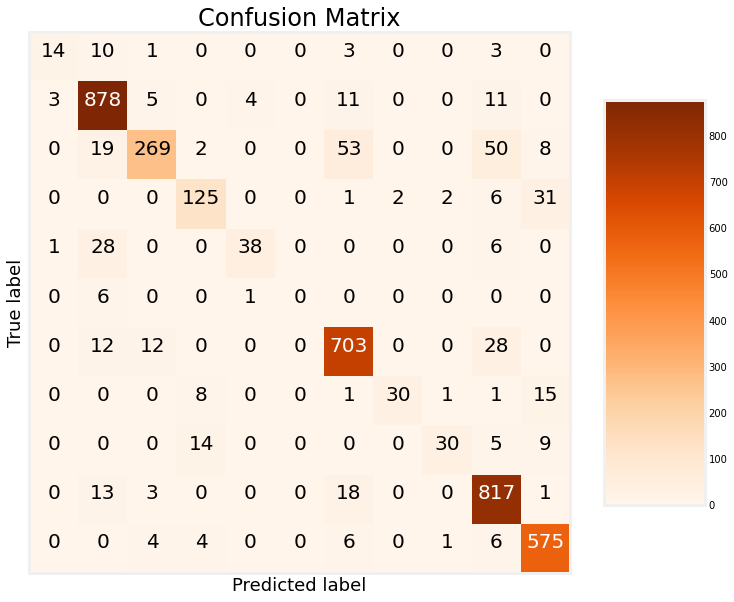

In [47]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm,title = 'Confusion Matrix')

## Using Neural network so as to increase accuracy and make the model perform better.

In [48]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.utils import np_utils

In [49]:
data=pd.read_csv("codon_usage.csv")

In [50]:
data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [51]:
data.drop(["SpeciesID","SpeciesName"],axis=1,inplace=True)

In [52]:
data.drop([5063,486],inplace=True)

In [53]:
v=[5063,486]
data[data["UUU"]=="non-B hepatitis virus"]

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA


In [54]:
data["DNAtype"]=data["DNAtype"].astype("int")
data["UUU"]=data["UUU"].astype("float")
data["UUC"]=data["UUC"].astype("float")

In [55]:
data["DNAtype"].value_counts()

0     9265
1     2899
2      816
4       31
12       5
5        2
11       2
3        2
9        2
7        1
6        1
Name: DNAtype, dtype: int64

In [56]:
data["DNAtype"].replace(12,10, regex=True,inplace=True)

In [57]:
data["DNAtype"].value_counts()

0     9265
1     2899
2      816
4       31
10       5
5        2
11       2
3        2
9        2
7        1
6        1
Name: DNAtype, dtype: int64

In [58]:
y=np.array(data["DNAtype"])

In [59]:
x=data.drop(["DNAtype","Kingdom"],axis=1).values
y=np.array(data["DNAtype"])

In [60]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x=s.fit_transform(x)

In [61]:
x

array([[-1.07850138e-01, -4.69600340e-01, -9.83805274e-01, ...,
         4.87379063e-01, -1.02240587e-01, -5.97312851e-01],
       [-1.08574023e-01,  1.31745714e-01, -8.51022151e-01, ...,
         5.99431104e-01,  1.01904507e-01, -5.97312851e-01],
       [-1.03866689e-01, -2.88061908e-01, -1.41408449e-01, ...,
         1.27174335e+00, -6.69310295e-01, -4.58107738e-01],
       ...,
       [-1.08279467e-01, -6.00648394e-01,  8.42393780e-01, ...,
         1.07565228e+00,  6.80315609e-01,  1.35252544e+00],
       [ 5.63865340e+01, -4.11167657e-01, -2.72467115e-01, ...,
        -3.64216443e-01,  2.26659843e-01, -4.46507312e-01],
       [ 1.23927108e+01, -3.99254197e-01,  1.18987169e+00, ...,
        -4.48681281e-02,  6.23608638e-01,  1.49173055e+00]])

In [62]:
y=np.array(data["DNAtype"])
encoding=OneHotEncoder()
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [63]:

x_train,x_test,y_train,y_test=train_test_split(x,dummy_y,random_state=12)

In [64]:
x_train=pd.DataFrame(x_train)
y_train=pd.DataFrame(y_train)
x_test=pd.DataFrame(x_test)
y_test=pd.DataFrame(y_test)

In [65]:
# adagrad,rmsprop,adam etc
def modelcreating(optimizer="adagrad",loss="categorical_crossentropy"):
    model=Sequential()
    model.add(Dense(65,input_dim=65,activation="tanh"))
    model.add(Dense(128,activation="tanh"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(11,activation="softmax"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=25)

In [66]:
model=modelcreating()
model.fit(x_train,y_train,validation_data=(x_test,y_test),
         epochs=30,batch_size=64,verbose=1,callbacks=callbacks)

Epoch 1/30
153/153 [==============================] - 4s 7ms/step - loss: 1.8374 - accuracy: 0.6572 - val_loss: 1.3488 - val_accuracy: 0.9021
Epoch 2/30
153/153 [==============================] - 1s 5ms/step - loss: 1.0198 - accuracy: 0.9220 - val_loss: 0.7389 - val_accuracy: 0.9303
Epoch 3/30
153/153 [==============================] - 1s 5ms/step - loss: 0.5810 - accuracy: 0.9390 - val_loss: 0.4547 - val_accuracy: 0.9417
Epoch 4/30
153/153 [==============================] - 1s 5ms/step - loss: 0.3804 - accuracy: 0.9486 - val_loss: 0.3205 - val_accuracy: 0.9503
Epoch 5/30
153/153 [==============================] - 1s 5ms/step - loss: 0.2801 - accuracy: 0.9574 - val_loss: 0.2477 - val_accuracy: 0.9613
Epoch 6/30
153/153 [==============================] - 1s 5ms/step - loss: 0.2231 - accuracy: 0.9636 - val_loss: 0.2039 - val_accuracy: 0.9644
Epoch 7/30
153/153 [==============================] - 1s 5ms/step - loss: 0.1875 - accuracy: 0.9663 - val_loss: 0.1756 - val_accuracy: 0.9668
Epoch 

In [67]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,1.837362,0.657181,1.348783,0.902057
1,1.019831,0.921998,0.738864,0.930304
2,0.581036,0.938991,0.454669,0.941664
3,0.380439,0.948613,0.320503,0.950261
4,0.280100,0.957416,0.247694,0.961314


<Figure size 720x432 with 0 Axes>

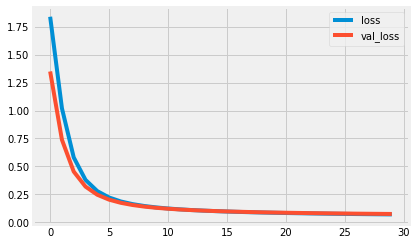

In [68]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

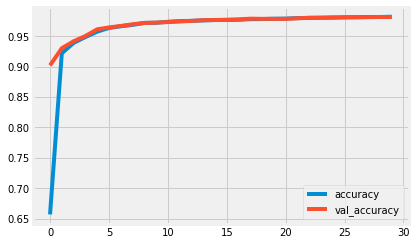

In [69]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [70]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_dummy=np.argmax(np.array(y_test),axis=1)
y_dummy

array([1, 0, 0, ..., 0, 1, 2])

In [71]:
print(confusion_matrix(y_dummy,y_pred))
print(classification_report(y_dummy,y_pred))

[[2273    5    8    0    0]
 [   6  726   17    0    0]
 [   9    4  198    0    0]
 [   0    0    1    0    0]
 [   3    1    6    0    0]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.99      0.97      0.98       749
           2       0.86      0.94      0.90       211
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10

    accuracy                           0.98      3257
   macro avg       0.57      0.58      0.57      3257
weighted avg       0.98      0.98      0.98      3257

